## 1. 基础数据结构

1. Timestamp，取代了datetime.datetime对象，支持向量化运算，是构建pd.DatetimeIndex的基础。
2. Period，代表固定频率的时间周期，构建pd.PeriodIndex的基础。
3. Timedelta，取代了datetime.timedelta对象，用于时间差的运算。

简单来说，pandas提供了取代datetime模块的数据类型，而且基于numpy.datetime64进行优化，支持向量化运算，特别适用于数据分析。

In [1]:
import pandas as pd

创建pd.Timestamp和pd.DatetimeIndex对象。

In [2]:
ts = pd.Timestamp("20190101")
ts

Timestamp('2019-01-01 00:00:00')

In [3]:
ts.strftime("%Y.%m.%d")

'2019.01.01'

In [4]:
ts.year, ts.month, ts.day

(2019, 1, 1)

用pd.to_datetime()和pd.date_range()快速创建时间戳。

In [5]:
pd.to_datetime("20190101")

Timestamp('2019-01-01 00:00:00')

In [6]:
pd.to_datetime(["20190101", "20190105", "20190205"])

DatetimeIndex(['2019-01-01', '2019-01-05', '2019-02-05'], dtype='datetime64[ns]', freq=None)

pd.date_range()专门用于创建规则的时间序列。

通过变换start, end, periods, freq等几个核心参数，能够创建任何想要的时间序列。

关于freq的使用，查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [7]:
pd.date_range(start="20190101", periods=10, freq="D")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

In [8]:
pd.date_range(start="20190101", end="20191231", freq="M")

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

## 2. 重采样

resampling: 重采样(频率转换)，例如将日数据转化为月数据(down sampling)，或者将小时数据转化为分钟数据(up sampling)。

In [13]:
import os
from pandas_datareader import data

API_QUANDL = "cVAoHy5Q6Lwx43SkSRNf"
API_AV = "3NPFIBSDY06J0M98"

In [14]:
aapl = data.DataReader("WIKI/AAPL", start="20180101", end="20191201",
                       data_source="quandl", api_key=API_QUANDL)
aapl.sort_values("Date", ascending=True, inplace=True)
aapl.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-01-02,170.16,172.30,169.26,172.26,25048048.0,0.0,1.0,170.16,172.30,169.26,172.26,25048048.0
2018-01-03,172.53,174.55,171.96,172.23,28819653.0,0.0,1.0,172.53,174.55,171.96,172.23,28819653.0
2018-01-04,172.54,173.47,172.08,173.03,22211345.0,0.0,1.0,172.54,173.47,172.08,173.03,22211345.0
2018-01-05,173.44,175.37,173.05,175.00,23016177.0,0.0,1.0,173.44,175.37,173.05,175.00,23016177.0
2018-01-08,174.35,175.61,173.93,174.35,20134092.0,0.0,1.0,174.35,175.61,173.93,174.35,20134092.0


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

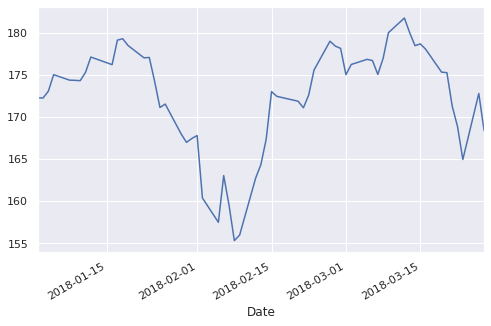

In [16]:
aapl["AdjClose"].plot(figsize=(8, 5))

重采样的方法有两个：df.resample(), df.asfreq().

* df.resample ==> 数据'汇总'，可以对样本内的数据进行求和，计算均值等
* df.asfreq ==> 数据'筛选'，挑选子样本的最后一个值

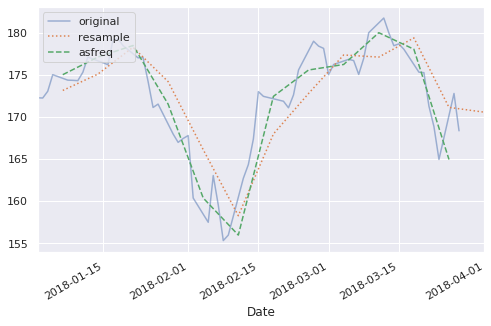

In [17]:
cl = aapl["AdjClose"]

cl.plot(alpha=0.5, style="-", figsize=(8, 5))

# 日收盘价转化为周收盘价，每周收盘价为当周每天收盘价的均值
cl.resample("W").mean().plot(style=":")

# 筛选每周最后一天的值，如果最后一天为空，用向前填充弥补
cl.asfreq("W", method="ffill").plot(style="--")

plt.legend(['original', 'resample', 'asfreq'], loc='upper left');

一种常用的操作方法是把日图OHLCV转化为周图OHLCV，高开低收分别要用不同的规则进行汇总。

In [22]:
daily_ohlcv = aapl[["Open", "High", "Low", "Close", "Volume"]]
daily_ohlcv.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-14,180.32,180.52,177.8100,178.440,29075469.0
2018-03-15,178.50,180.24,178.0701,178.650,22584565.0
2018-03-16,178.65,179.12,177.6200,178.020,36836456.0
2018-03-19,177.32,177.47,173.6600,175.300,32804695.0
2018-03-20,175.24,176.80,174.9400,175.240,19314039.0
2018-03-21,175.04,175.09,171.2600,171.270,35247358.0
2018-03-22,170.00,172.68,168.6000,168.845,41051076.0
2018-03-23,168.39,169.92,164.9400,164.940,40248954.0
2018-03-26,168.07,173.10,166.4400,172.770,36272617.0


In [26]:
# 高开低收分别用不同的规则汇总
agg_rules = {
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
}

weekly_ohlcv = daily_ohlcv.resample(
    "W",  # 按周汇总
    closed="right",  # (上周周日，本周周日]
    label="right"  # 用周日的时间戳为标签
).agg(agg_rules)

weekly_ohlcv.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-28,177.30,179.440,170.06,171.510,185072080.0
2018-02-04,170.16,170.160,160.10,160.370,248091289.0
2018-02-11,159.10,163.880,150.24,155.970,299885932.0
2018-02-18,158.50,174.820,157.51,172.430,222582467.0
2018-02-25,172.05,175.650,171.01,175.555,133197874.0
2018-03-04,176.35,180.615,172.45,176.210,196432091.0
2018-03-11,175.21,180.000,174.27,179.980,138442235.0
2018-03-18,180.29,183.500,177.62,178.020,151720299.0
2018-03-25,177.32,177.470,164.94,164.940,168666122.0


In [27]:
monthly_ohlcv = daily_ohlcv.resample(
    "MS",  # 按MonthStart汇总
    closed="left",  # [每月1号，下月1号)
    label="left"  # 用每个月第一天作为标签
).agg(agg_rules)

monthly_ohlcv.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01,170.160,180.100,164.70,167.43,639245534.0
2018-02-01,167.165,180.615,150.24,178.12,888378184.0
2018-03-01,178.540,183.500,164.94,168.34,621320032.0


## 3. 时间位移

In [66]:
# 将收盘价向前移动3天
pd.concat([cl, cl.shift(3)], axis=1).head(10)

,AdjClose,AdjClose
Date,,
2018-01-02,172.26,NaN
2018-01-03,172.23,NaN
2018-01-04,173.03,NaN
2018-01-05,175.00,172.26
2018-01-08,174.35,172.23
2018-01-09,174.33,173.03
2018-01-10,174.29,175.00
2018-01-11,175.28,174.35
2018-01-12,177.09,174.33


In [67]:
# 将收盘价向后移动3天
pd.concat([cl, cl.shift(-3)], axis=1).tail(10)

,AdjClose,AdjClose
Date,,
2018-03-14,178.440,175.300
2018-03-15,178.650,175.240
2018-03-16,178.020,171.270
2018-03-19,175.300,168.845
2018-03-20,175.240,164.940
2018-03-21,171.270,172.770
2018-03-22,168.845,168.340
2018-03-23,164.940,NaN
2018-03-26,172.770,NaN


时间位移经常用于计算期间收益率。

Text(0, 0.5, '5-day returns')

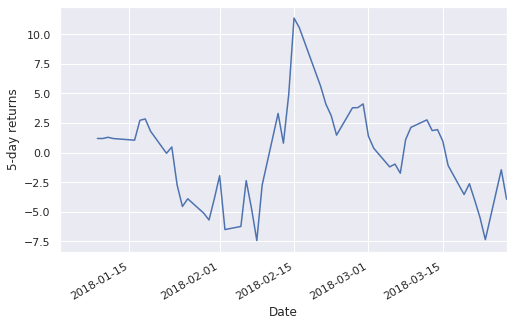

In [70]:
# 计算5天收益率
rets_5d = (cl / cl.shift(5) - 1) * 100
rets_5d.plot(figsize=(8, 5))
plt.ylabel("5-day returns")

## 4. 滚动窗口

滚动窗口经常用于计算技术指标。

In [79]:
# 计算收盘价的滚动标准分数（Rolling Z-Score）
window = 5
rolling = cl.rolling(window)
rolling_mean = rolling.mean()
rolling_std = rolling.std()
rolling_zscore = (cl - rolling_mean) / rolling_std

df = pd.concat([cl, rolling_zscore], axis=1)
df.columns = ["close", "zscore"]
df.head(10)

,close,zscore
Date,,
2018-01-02,172.26,NaN
2018-01-03,172.23,NaN
2018-01-04,173.03,NaN
2018-01-05,175.00,NaN
2018-01-08,174.35,0.779895
2018-01-09,174.33,0.480925
2018-01-10,174.29,0.125522
2018-01-11,175.28,1.373628
2018-01-12,177.09,1.679342
